<a href="https://colab.research.google.com/github/ratnesh003/IIT-Gandhinagar-Assignment/blob/main/Gandinagar_1st_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrate Bias-Variance Tradeoff

## Installing Dependencies and Importing methods

In [4]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install google-colab
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.3 MB/s eta 0:00:00


In [5]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

## Mounting the google drive
Mounting the google drive to load data into the python script <br>
the dataset break down as follows according to the file structure
### train data ( 7352 Entries )
1. X_train.txt
2. Y_train.txt
3. subject_train.txt
4. Inertial Signal
    * body_acc_x_train.txt
    * body_acc_y_train.txt
    * body_acc_z_train.txt
    * body_gyro_x_train.txt
    * body_gyro_y_train.txt
    * body_gyro_z_train.txt
    * total_acc_x_train.txt
    * total_acc_y_train.txt
    * total_acc_z_train.txt


### test data ( 2947 Entries)
1. X_test.txt
2. Y_test.txt
3. subject_test.txt
4. Inertial Signal
    * body_acc_x_test.txt
    * body_acc_y_test.txt
    * body_acc_z_test.txt
    * body_gyro_x_test.txt
    * body_gyro_y_test.txt
    * body_gyro_z_test.txt
    * total_acc_x_test.txt
    * total_acc_y_test.txt
    * total_acc_z_test.txt

common path that is provided for all datasets <br>
and Checking the numbers of features in data set i.e. **561**

In [6]:
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
!ls /content/drive/MyDrive/ML/human+activity+recognition+using+smartphones/UCI_HAR_Dataset/UCI_HAR_Dataset

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [8]:
common_path = '/content/drive/MyDrive/ML/human+activity+recognition+using+smartphones/UCI_HAR_Dataset/UCI_HAR_Dataset/'

features = pd.read_csv(common_path + 'features.txt', sep='\s+', header=None, names=['index', 'feature_name'])
feature_names = features['feature_name'].tolist()

print(f"Feature names: {feature_names}")
print(f"Number of Features: {len(feature_names)}")

Feature names: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc

## Data Loading and Merging
This code loads the training and test data from text files, then combines the subject, activity, and sensor data into one dataset for each (train and test) to prepare for analysis.

In [9]:
X_train = pd.read_csv(common_path + 'train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv(common_path + 'train/y_train.txt', sep='\s+', header=None, names=['activity'])
subject_train = pd.read_csv(common_path + 'train/subject_train.txt', sep='\s+', header=None, names=['subject'])

X_test = pd.read_csv(common_path + 'test/X_test.txt', sep='\s+', header=None)
y_test = pd.read_csv(common_path + 'test/y_test.txt', sep='\s+', header=None, names=['activity'])
subject_test = pd.read_csv(common_path + 'test/subject_test.txt', sep='\s+', header=None, names=['subject'])

train_data = pd.concat([subject_train, y_train, X_train], axis=1)
test_data = pd.concat([subject_test, y_test, X_test], axis=1)

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
train_data.head()

Train data shape: (7352, 563)
Test data shape: (2947, 563)


,subject,activity,0,1,2,3,4,5,6,7,...,551,552,553,554,555,556,557,558,559,560
0,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


## Training The Decision Tree Models
Training Decision Tree models with varying depths (1 to 20) and evaluates their accuracy on both the training and test datasets. It stores the accuracies and trained models for analysis, helping to observe the impact of tree depth on performance.

In [11]:
train_accuracies = []
test_accuracies = []

model_trained = []
tree_depths = range(1, 21)

for depth in tree_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    model_trained.append(model)

## Plotting The Accuracy for Varing Depth Decision Trees

### Line Plot

line plot to visualize the relationship between tree depth and accuracy for both training and testing datasets. It highlights the bias-variance tradeoff, helping to identify the optimal tree depth for the model.

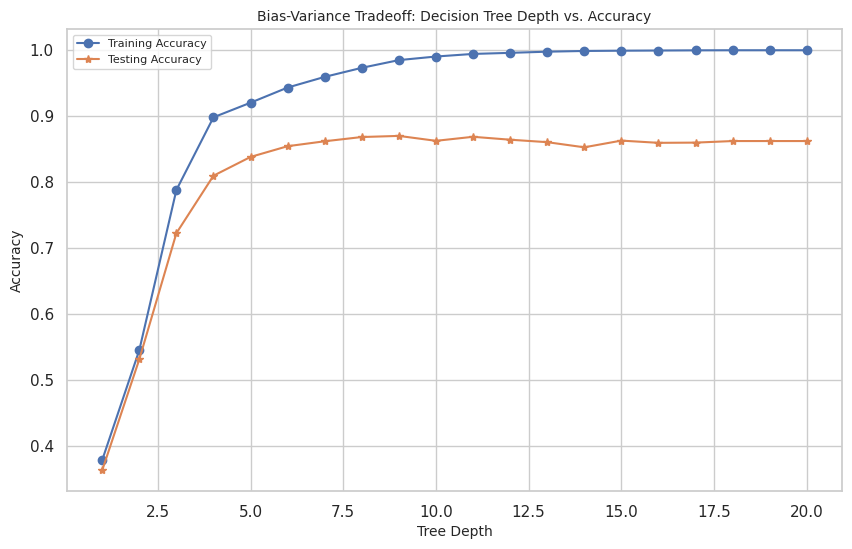

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(tree_depths, test_accuracies, label='Testing Accuracy', marker='*')
plt.title('Bias-Variance Tradeoff: Decision Tree Depth vs. Accuracy', fontsize=10)
plt.xlabel('Tree Depth', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

### Confusion Matrix
Confusion Matrix similar to the line plot above to observe the optimal Depth for the Decision tree model to observe the gradual improvement of the model on increasing depth.

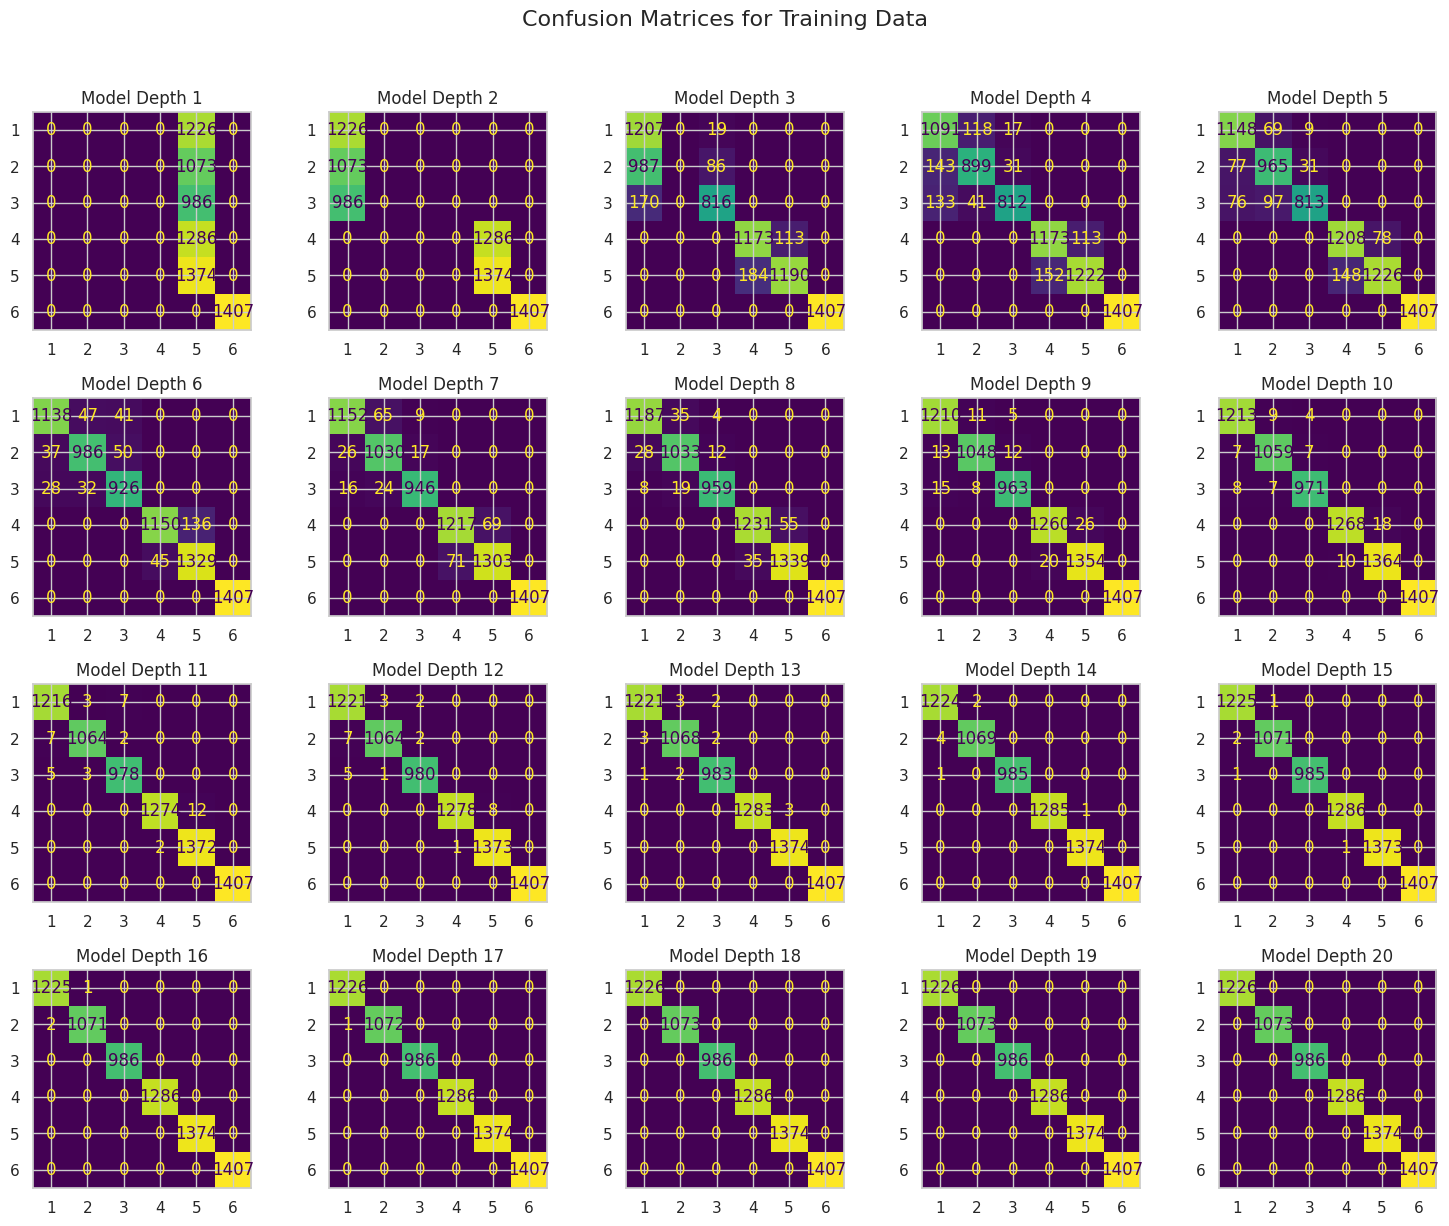

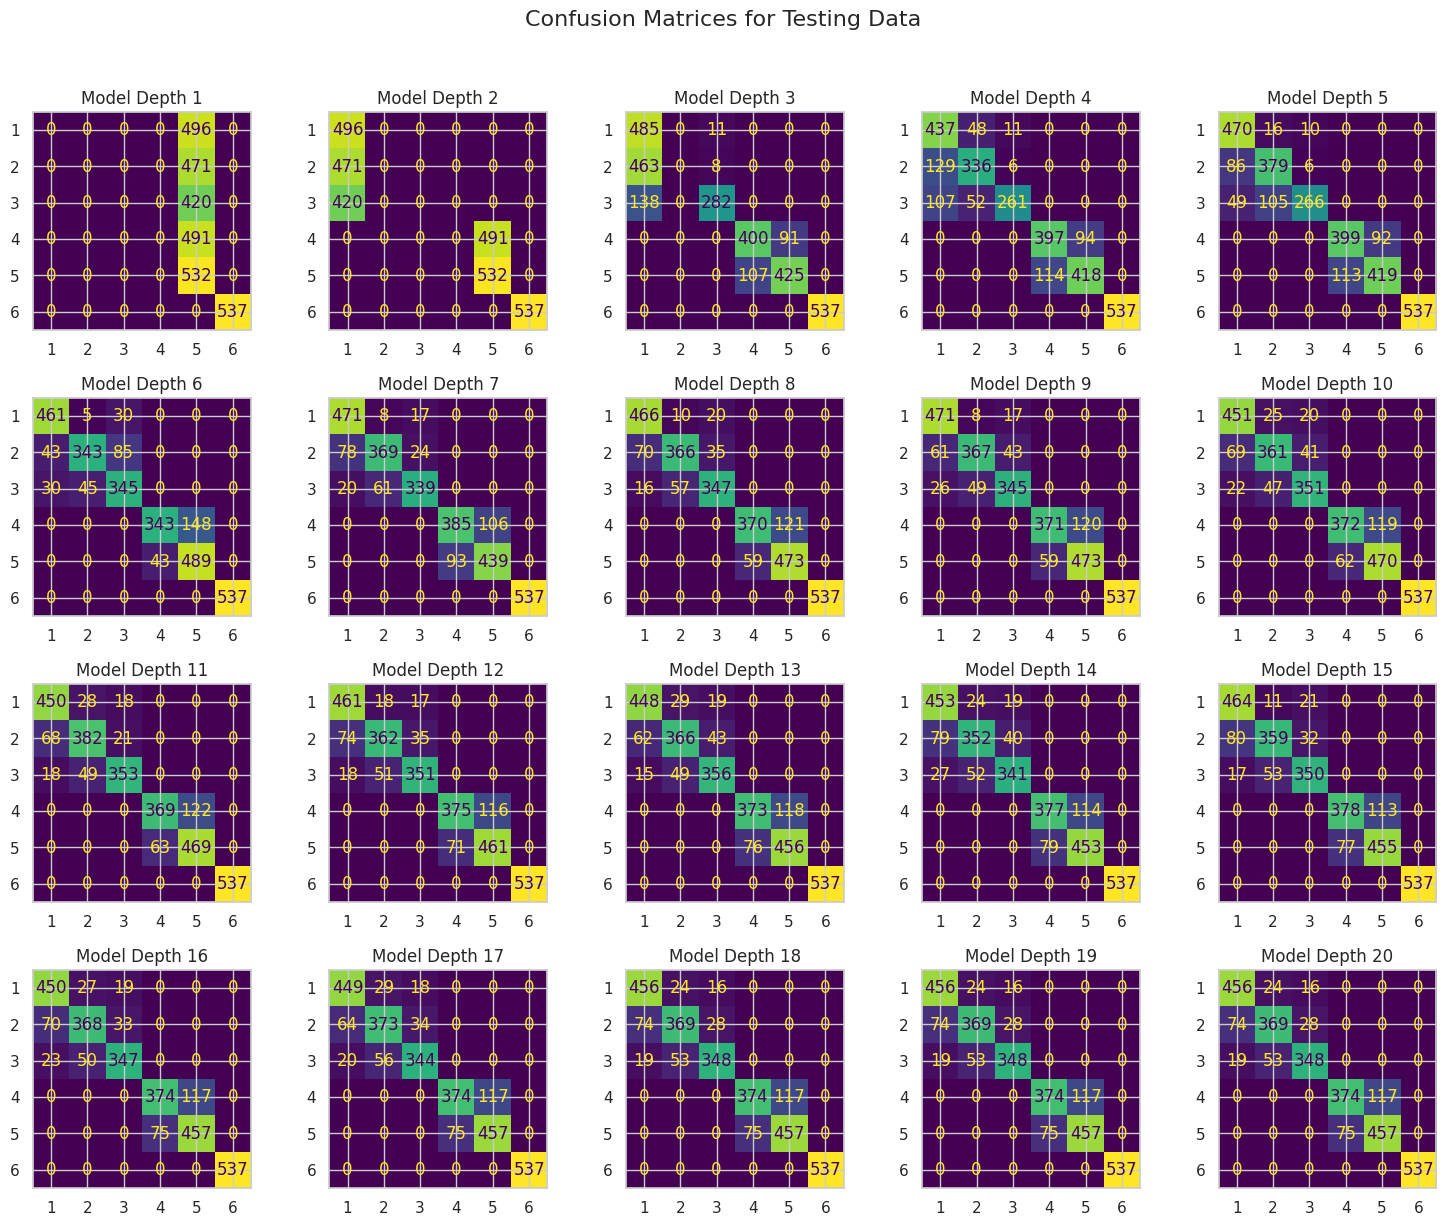

In [55]:
def plot_confusion_matrices(models, X, y, dataset_type):
    num_models = len(model_trained)
    num_cols = 5
    num_rows = 4

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    fig.suptitle(f'Confusion Matrices for {dataset_type} Data', fontsize=16, y=1.02)

    axes = axes.flatten()

    for i, model in enumerate(model_trained):
        y_pred = model.predict(X)

        cm = confusion_matrix(y, y_pred, labels=model.classes_)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(ax=axes[i], colorbar=False)
        axes[i].set_title(f'Model Depth {i + 1}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    for i in range(len(models), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(model_trained, X_train, y_train, "Training")
plot_confusion_matrices(model_trained, X_test, y_test, "Testing")
